In [12]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager, rc
plt.rcParams['font.family'] = 'NanumGothic'
import platform
if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
    rc('font', family='AppleGothic')

matplotlib.rcParams['axes.unicode_minus'] = False

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error as mae

from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score

In [5]:
train_one = pd.read_csv("data/train6.csv")
test_one = pd.read_csv("data/test6.csv")

In [45]:
train_one.columns

Index(['단지코드', '지하철역', '버스정류장', '등록차량수', '연면적', '위도', '경도', '총인구수', '세대당_인구',
       '공가수_비율', '0~19 인구수', '20~39 인구수', '40~69 인구수', '70세이상 인구수', 'sub_0',
       'sub_1', 'sub_dist_0', 'sub_dist_1', 'sub_dist_2', 'cluster',
       'apt임대료min', 'apt임대료25%', 'apt임대료50%', 'apt임대료75%', 'apt임대료max',
       'apt임대보증금min', 'apt임대보증금25%', 'apt임대보증금50%', 'apt임대보증금75%',
       'apt임대보증금max', 'store임대료max', 'store임대보증금max', 'apt전용면적min',
       'apt전용면적25%', 'apt전용면적50%', 'apt전용면적75%', 'apt전용면적max', 'store전용면적mean',
       'store전용면적std', 'store개수', 'store임대료mean', 'store임대료std',
       'store임대보증금mean', 'store임대보증금std', 'cluster_임대보증금', '단지내주차면수'],
      dtype='object')

In [44]:
X = train_one.drop(['등록차량수','단지코드'],axis=1)
y = train_one['등록차량수']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=2021,shuffle=True)

cb = CatBoostRegressor(random_state=2021,verbose=False,loss_function='MAE',max_depth=4,n_estimators=400).fit(X_train, y_train)
pred = cb.predict(X_test)

mae(pred,y_test) 

111.59193805809483

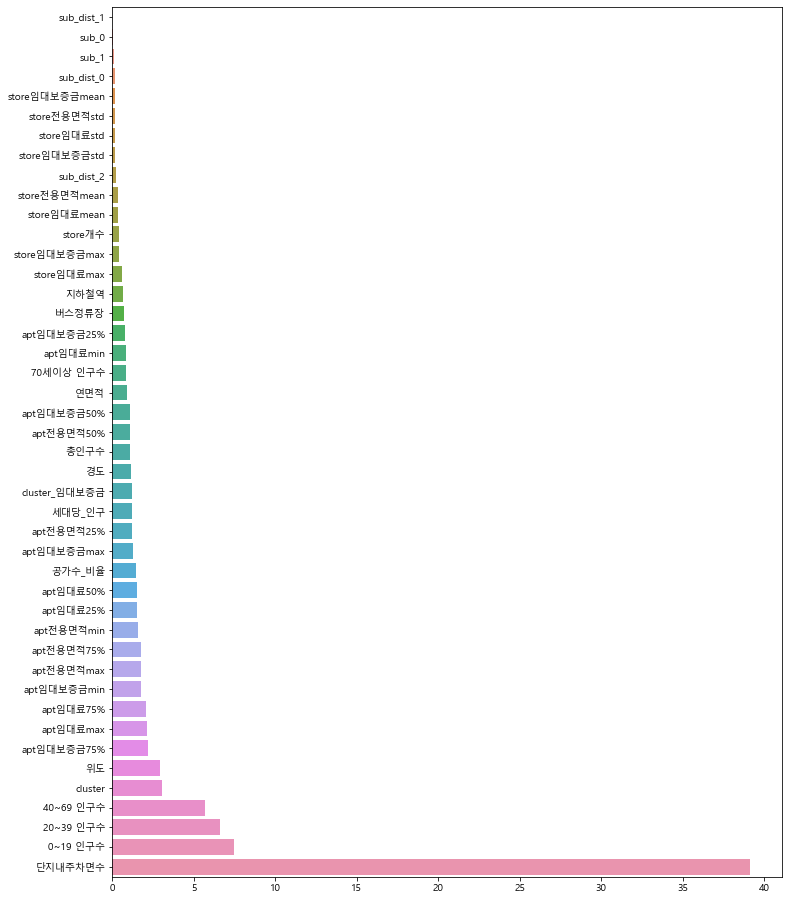

In [46]:
plt.figure(figsize=(12,16))
sns.barplot(y = X_train.columns[np.argsort(cb.feature_importances_)], x = list(cb.feature_importances_[np.argsort(cb.feature_importances_)]))

In [39]:
grid = {'max_depth': [4,5,6,7,8],'n_estimators':[100, 200, 300,400,500]}

In [43]:
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import GridSearchCV

# cbc = CatBoostRegressor(random_state=2021,verbose=False,loss_function='MAE')
# gscv = GridSearchCV (estimator = cbc, param_grid = grid, scoring ="neg_mean_absolute_error", cv = 5)

# gscv.fit(X,y)

In [41]:
print(gscv.best_estimator_)
print(gscv.best_score_)
print(gscv.best_params_)

-147.75340066876905
{'max_depth': 4, 'n_estimators': 400}


In [47]:
real_x = test_one.drop('단지코드',axis=1)
real_y = cb.predict(real_x)

In [51]:
def myfunc():
    cb = pd.read_csv("0713_cb.csv")
    cb = cb.loc[-cb['code'].isin(['C2675', 'C2335', 'C1327']),:].reset_index(drop=True)
    return cb

res = myfunc()
mae(real_y,res['num'])

58.44367895870471

In [50]:
import os
path = os.path.dirname(os.getcwd())
path = os.path.join(path, "ProcessedData")

test_one['num'] = real_y
res = test_one[['단지코드','num']]

sub = pd.read_csv(os.path.join(path,"sample_submission.csv"))
sub['num'] = 0
sub = pd.merge(sub,res,left_on='code',right_on='단지코드',how='left').drop(['num_x','단지코드'],axis=1)

sub = sub.rename(columns={'num_y':'num'})

sub.to_csv("good1.csv",index=False)

In [52]:
real_y

array([ 780.83233874, 1170.29355397,  586.48889183,  515.96630011,
       1205.59843081, 1559.67401047, 1055.13363741,  469.49989755,
        327.33071306,  285.99046105,  424.70515235,  168.11040472,
        391.47588845,  255.15408734,  232.64834596,  287.24256918,
        531.51077151,  299.33727679,  142.00452345,  683.03144673,
        199.03493096,  468.10185326,  542.23118808,  480.87953323,
        453.82908571,  134.08514019,   98.46510815,  651.17977195,
        578.2858394 ,  583.08621704, 1022.32091076,  236.78388672,
        483.66462657,  289.04796178,   97.36011952,  274.81848608,
        397.70138052,  653.8177038 ,  858.18282028,  313.26654839,
        437.471937  ,  450.58958522,  374.90403624,  587.76237711,
        866.36342466, 1135.31817611,  485.56297852,  609.89233442,
        378.64366944,  336.09307519,  855.68361446,  258.28154632,
       1115.26658434,  658.02102096,  635.01236321,  278.37159759,
        612.96221567,  296.57848963,  439.25473165,  214.70186